In [ ]:
from huggingface_hub import login

token = '_'
login(token=token, add_to_git_credential=True)

In [ ]:
! pip install -q \
  diffusers \
  transformers \
  safetensors \
  sentencepiece \
  accelerate \
  bitsandbytes \
  einops \
  mediapy \
  accelerate \
  matplotlib \
  numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import mediapy as media
from pprint import pprint
from tqdm import tqdm
from google.colab import files
import math
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
from diffusers import DiffusionPipeline
from transformers import T5EncoderModel

# For downloading web images
import requests
from io import BytesIO

device = 'cuda'
working_directory_path = '/Users/sshashi/Desktop/Berkeley/3rdYear/CS180/CS180Projects/project5'

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Load DeepFloyd IF stage I
stage_1 = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-I-L-v1.0",
    text_encoder=None,
    variant="fp16",
    torch_dtype=torch.float16,
)
stage_1.to(device)

# Load DeepFloyd IF stage II
stage_2 = DiffusionPipeline.from_pretrained(
                "DeepFloyd/IF-II-L-v1.0",
                text_encoder=None,
                variant="fp16",
                torch_dtype=torch.float16,
              )
stage_2.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/604 [00:00<?, ?B/s]


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00001-of-00002.safetensors, text_encoder/model.fp16-00002-of-00002.safetensors, safety_checker/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.57k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.87G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

watermarker/config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model_index.json:   0%|          | 0.00/692 [00:00<?, ?B/s]


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00001-of-00002.safetensors, text_encoder/model.fp16-00002-of-00002.safetensors, safety_checker/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

(…)_noising_scheduler/scheduler_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.49G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/15.5k [00:00<?, ?B/s]

watermarker/config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

IFSuperResolutionPipeline {
  "_class_name": "IFSuperResolutionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "DeepFloyd/IF-II-L-v1.0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_noising_scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "deepfloyd_if",
    "IFSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "text_encoder": [
    null,
    null
  ],
  "tokenizer": [
    "transformers",
    "T5Tokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "watermarker": [
    "deepfloyd_if",
    "IFWatermarker"
  ]
}

In [ ]:
!wget https://cal-cs180.github.io/fa24/hw/proj5/prompt_embeds_dict.pth -O prompt_embeds_dict.pth

prompt_embeds_dict = torch.load('prompt_embeds_dict.pth')

pprint(list(prompt_embeds_dict.keys()))

--2024-11-20 19:46:36--  https://cal-cs180.github.io/fa24/hw/proj5/prompt_embeds_dict.pth
Resolving cal-cs180.github.io (cal-cs180.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to cal-cs180.github.io (cal-cs180.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8836210 (8.4M) [application/octet-stream]
Saving to: ‘prompt_embeds_dict.pth’

prompt_embeds_dict. 100%[===================>]   8.43M  --.-KB/s    in 0.02s   

2024-11-20 19:46:36 (344 MB/s) - ‘prompt_embeds_dict.pth’ saved [8836210/8836210]

['an oil painting of a snowy mountain village',
 'a photo of the amalfi cost',
 'a photo of a man',
 'a photo of a hipster barista',
 'a photo of a dog',
 'an oil painting of people around a campfire',
 'an oil painting of an old man',
 'a lithograph of waterfalls',
 'a lithograph of a skull',
 'a man wearing a hat',
 'a high quality photo',
 '',
 'a rocket ship',
 'a pencil']


<ipython-input-5-7ecdf133b151>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  prompt_embeds_dict = torch.load('prompt_embeds_dict.pth')


In [ ]:
def seed_everything(seed):
  torch.cuda.manual_seed(seed)
  torch.manual_seed(seed)

YOUR_SEED = 826
seed_everything(YOUR_SEED)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

an oil painting of a snowy mountain village,a man wearing a hat,a rocket ship

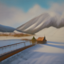
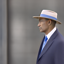
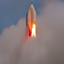

an oil painting of a snowy mountain village,a man wearing a hat,a rocket ship

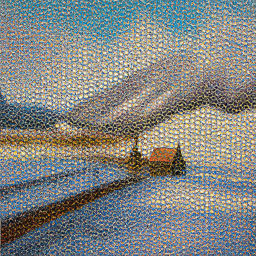
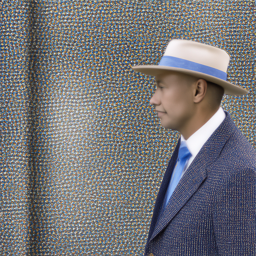
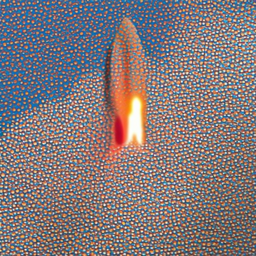

In [ ]:
# Get prompt embeddings from the precomputed cache.
# `prompt_embeds` is of shape [N, 77, 4096]
# 77 comes from the max sequence length that deepfloyd will take
# and 4096 comes from the embedding dimension of the text encoder
# `negative_prompt_embeds` is the same shape as `prompt_embeds` and is used
# for Classifier Free Guidance.
prompts = [
    'an oil painting of a snowy mountain village',
    'a man wearing a hat',
    "a rocket ship",
]
prompt_embeds = torch.cat([
    prompt_embeds_dict[prompt] for prompt in prompts
], dim=0)
negative_prompt_embeds = torch.cat(
    [prompt_embeds_dict['']] * len(prompts)
)

# Sample from stage 1
# Outputs a [N, 3, 64, 64] torch tensor
# num_inference_steps is an integer between 1 and 1000, indicating how many
# denoising steps to take: lower is faster, at the cost of reduced quality
stage_1_output = stage_1(
    prompt_embeds=prompt_embeds,
    negative_prompt_embeds=negative_prompt_embeds,
    num_inference_steps=5,
    output_type="pt"
).images

# Sample from stage 2
# Outputs a [N, 3, 256, 256] torch tensor
# num_inference_steps is an integer between 1 and 1000, indicating how many
# denoising steps to take: lower is faster, at the cost of reduced quality
stage_2_output = stage_2(
    image=stage_1_output,
    num_inference_steps=5,
    prompt_embeds=prompt_embeds,
    negative_prompt_embeds=negative_prompt_embeds,
    output_type="pt",
).images

# Display images
# We need to permute the dimensions because `media.show_images` expects
# a tensor of shape [N, H, W, C], but the above stages gives us tensors of
# shape [N, C, H, W]. We also need to normalize from [-1, 1], which is the
# output of the above stages, to [0, 1]
media.show_images(
    stage_1_output.permute(0, 2, 3, 1).cpu() / 2. + 0.5,
    titles=prompts)
media.show_images(
    stage_2_output.permute(0, 2, 3, 1).cpu() / 2. + 0.5,
    titles=prompts)


In [ ]:
# Save images
images = (stage_2_output.permute(0, 2, 3, 1).cpu() / 2 + 0.5).clamp(0, 1) * 255
images = images.to(torch.uint8)

for i, img_tensor in enumerate(images):
    img = Image.fromarray(img_tensor.numpy())
    img.save(f"sampling_{i}.jpg")
    files.download(f"sampling_{i}.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

URL transformed to HTTPS due to an HSTS policy
--2024-11-20 19:47:07--  https://cal-cs180.github.io/fa24/hw/proj5/assets/campanile.jpg
Resolving cal-cs180.github.io (cal-cs180.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to cal-cs180.github.io (cal-cs180.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75608 (74K) [image/jpeg]
Saving to: ‘campanile.jpg’

campanile.jpg       100%[===================>]  73.84K  --.-KB/s    in 0.002s  

2024-11-20 19:47:07 (35.0 MB/s) - ‘campanile.jpg’ saved [75608/75608]

Test image:


""

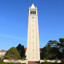

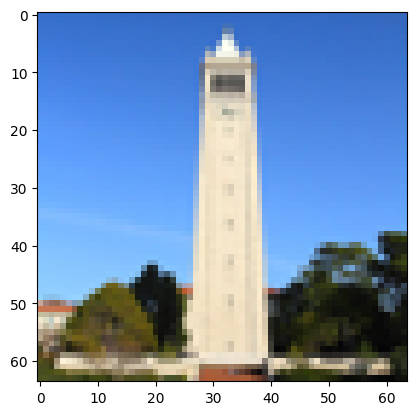

In [ ]:
# Get scheduler parameters
alphas_cumprod = stage_1.scheduler.alphas_cumprod

# Get test image
!wget cal-cs180.github.io/fa24/hw/proj5/assets/campanile.jpg -O campanile.jpg
test_im = Image.open('campanile.jpg')

# For stage 1: Resize to (64, 64), convert to tensor, rescale to [-1, 1], and
# add a batch dimension. The result is a (1, 3, 64, 64) tensor
test_im = Image.open('campanile.jpg').resize((64, 64))
test_im = TF.to_tensor(test_im)
test_im = 2 * test_im - 1
test_im = test_im[None]

# Show test image
print('Test image:')
media.show_image(test_im[0].permute(1,2,0) / 2. + 0.5)
plt.imshow(test_im[0].permute(1,2,0) / 2. + 0.5)
plt.show()

In [ ]:
def forward(clean_image, timestep):
  """
  Given a clean image and a timestep
  between 0-999 inclusive, outputs
  noised image corresponding to timestep.
  """
  alpha = alphas_cumprod[timestep]
  scaled_clean_image = math.sqrt(alpha) * clean_image

  epsilon = torch.randn_like(clean_image)
  noise = math.sqrt(1 - alpha) * epsilon

  noised_clean_image = scaled_clean_image + noise
  return noised_clean_image

""

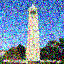

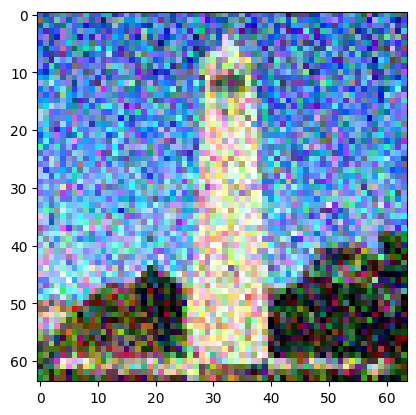

In [ ]:
im_noisy = forward(test_im[0], 250)
media.show_image(im_noisy.permute(1,2,0) / 2. + 0.5)
plt.imshow(im_noisy.permute(1,2,0) / 2. + 0.5)
plt.show()

In [ ]:
def denoise(noisy_image, kernel_size=5, sigma=3.0):
  denoised = TF.gaussian_blur(noisy_image, kernel_size, sigma)
  return denoised

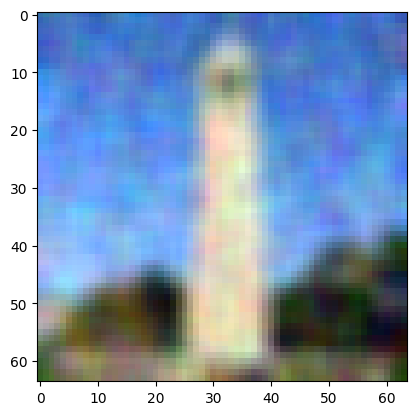

In [ ]:
im_classical_denoised = denoise(im_noisy)
plt.imshow(im_classical_denoised.permute(1,2,0) / 2. + 0.5)
plt.show()

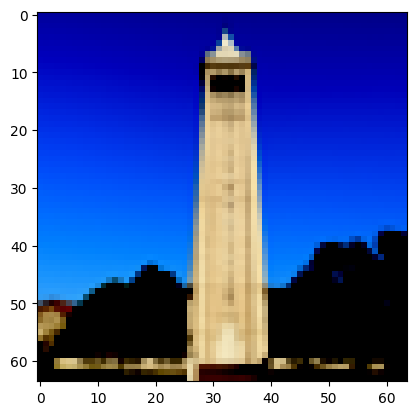

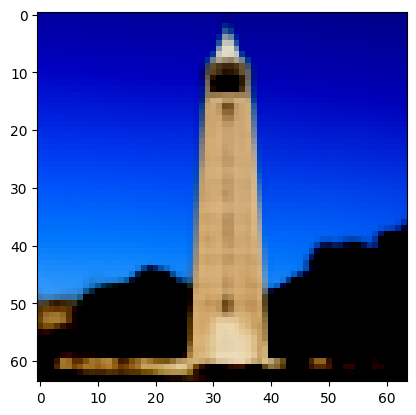

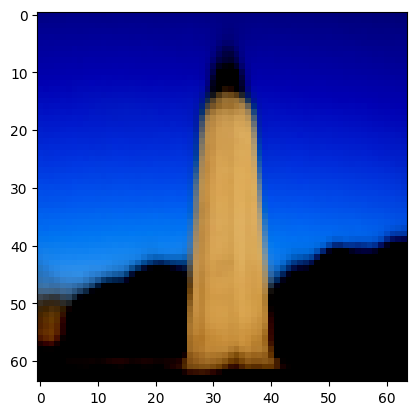

In [ ]:
# Please use this prompt embedding
prompt_embeds = prompt_embeds_dict["a high quality photo"]

with torch.no_grad():
  for t in [250, 500, 750]:
    # Get alpha bar
    alpha_cumprod = alphas_cumprod[t]

    # Run forward process

    # create `im_noisy`, which is `test_im` passed through the forward process
    im_noisy = forward(test_im, t)


    # Estimate noise in noisy image
    noise_est = stage_1.unet(
        im_noisy.half().cuda(),
        t,
        encoder_hidden_states=prompt_embeds,
        return_dict=False
    )[0]

    # Take only first 3 channels, and move result to cpu
    noise_est = noise_est[:, :3].cpu()

    # Remove the noise

    # create `clean_est`, the estimated clean image
    # also run `.detach().numpy()` on the image so we can display it
    scaled_noise_est = noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

    clean_est = (im_noisy / math.sqrt(alpha_cumprod)) - scaled_noise_est

    clean_est = clean_est[0].permute(1, 2, 0).detach().numpy()

    plt.imshow(clean_est)
    plt.show()


In [ ]:
# Make timesteps. Must be list of ints satisfying:
# - monotonically decreasing
# - ends at 0
# - begins close to or at 999

# Make strided_timesteps
max_timestep = 990
stride_length = 30
strided_timesteps = []

k = max_timestep
while k >= 0:
  strided_timesteps.append(k)
  k -= stride_length


stage_1.scheduler.set_timesteps(timesteps=strided_timesteps)    # Need this b/c variance computation

In [ ]:
def add_variance(predicted_variance, t, image):
  '''
  Args:
    predicted_variance : (1, 3, 64, 64) tensor, last three channels of the UNet output
    t: scale tensor indicating timestep
    image : (1, 3, 64, 64) tensor, noisy image

  Returns:
    (1, 3, 64, 64) tensor, image with the correct amount of variance added
  '''
  # Add learned variance
  variance = stage_1.scheduler._get_variance(t, predicted_variance=predicted_variance)
  variance_noise = torch.randn_like(image)
  variance = torch.exp(0.5 * variance) * variance_noise
  return image + variance

""

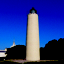

""

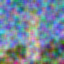

In [ ]:
def iterative_denoise(image, i_start, prompt_embeds, timesteps, display=True):
  with torch.no_grad():
    for i in range(i_start, len(timesteps) - 1):
      # Get timesteps
      t = timesteps[i]
      prev_t = timesteps[i+1]

      # Get alphas, betas

      alpha_cumprod = alphas_cumprod[t]
      alpha_cumprod_prev = alphas_cumprod[prev_t]

      alpha = alpha_cumprod / alpha_cumprod_prev
      beta = 1 - alpha

      # Get noise estimate
      model_output = stage_1.unet(
          image,
          t,
          encoder_hidden_states=prompt_embeds,
          return_dict=False
      )[0]

      # Split estimate into noise and variance estimate
      noise_est, predicted_variance = torch.split(model_output, image.shape[1], dim=1)

      scaled_noise_est = noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

      x_0 = (image / math.sqrt(alpha_cumprod)) - scaled_noise_est

      x_0_factor = math.sqrt(alpha_cumprod_prev) * beta / (1 - alpha_cumprod)

      scaled_x_0 = x_0_factor * x_0

      x_t = image

      x_t_factor = math.sqrt(alpha) * (1 - alpha_cumprod_prev) / (1 - alpha_cumprod)

      scaled_x_t = x_t_factor * x_t

      pred_prev_image = add_variance(predicted_variance,
                                     t,
                                     scaled_x_t + scaled_x_0)
      image = pred_prev_image

    clean = image.cpu().detach().numpy()

  return clean

# Please use this prompt embedding
prompt_embeds = prompt_embeds_dict["a high quality photo"]

# Add noise
i_start = 10
t = strided_timesteps[i_start]
im_noisy = forward(test_im, t).half().to(device)

# Denoise
clean = iterative_denoise(im_noisy,
                          i_start=i_start,
                          prompt_embeds=prompt_embeds,
                          timesteps=strided_timesteps)

# One step denoise
media.show_image(np.transpose(clean[0], (1, 2, 0)))


# Estimate noise in noisy image
noise_est = stage_1.unet(
    im_noisy.half().cuda(),
    t,
    encoder_hidden_states=prompt_embeds,
    return_dict=False
)[0]

# Take only first 3 channels, and move result to cpu
noise_est = noise_est[:, :3].cpu()

scaled_noise_est = noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

clean_one_step = (im_noisy / math.sqrt(alpha_cumprod)) - scaled_noise_est.to(device)

clean_one_step = clean_one_step.cpu()

# media.show_image(clean_one_step)


# Gaussian blur denoise


# Show results

blur_filtered = denoise(im_noisy, 5, 2.0).cpu()
media.show_image(blur_filtered[0].permute(1,2,0) / 2. + 0.5)

""

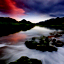

In [ ]:
# Please use this text prompt
prompt_embeds = prompt_embeds_dict["a high quality photo"]

generated = {}

i_start = 0
im_noisy = torch.randn_like(test_im).to(device).half()

clean = iterative_denoise(im_noisy,
                          i_start=i_start,
                          prompt_embeds=prompt_embeds,
                          timesteps=strided_timesteps)

media.show_image(np.transpose(clean[0], (1, 2, 0)))

In [ ]:
# The condition prompt embedding
prompt_embeds = prompt_embeds_dict['a high quality photo']

# The unconditional prompt embedding
uncond_prompt_embeds = prompt_embeds_dict['']


def iterative_denoise_cfg(image, i_start, prompt_embeds, uncond_prompt_embeds, timesteps, scale=7, display=True):
  with torch.no_grad():
    for i in range(i_start, len(timesteps) - 1):
      # Get timesteps
      t = timesteps[i]
      prev_t = timesteps[i+1]

      # Get alphas, betas

      alpha_cumprod = alphas_cumprod[t]
      alpha_cumprod_prev = alphas_cumprod[prev_t]

      alpha = alpha_cumprod / alpha_cumprod_prev
      beta = 1 - alpha

      # Get cond noise estimate
      model_output = stage_1.unet(
          image,
          t,
          encoder_hidden_states=prompt_embeds,
          return_dict=False
      )[0]

      # Get uncond noise estimate
      uncond_model_output = stage_1.unet(
          image,
          t,
          encoder_hidden_states=uncond_prompt_embeds,
          return_dict=False
      )[0]

      # Split estimate into noise and variance estimate
      noise_est, predicted_variance = torch.split(model_output, image.shape[1], dim=1)
      uncond_noise_est, _ = torch.split(uncond_model_output, image.shape[1], dim=1)

      # Do classifier free guidance

      # Compute the CFG noise estimate and put it in `model_output`.

      cfg_noise_est = uncond_noise_est + scale * (noise_est - uncond_noise_est)

      scaled_noise_est = cfg_noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

      x_0 = (image / math.sqrt(alpha_cumprod)) - scaled_noise_est

      x_0_factor = math.sqrt(alpha_cumprod_prev) * beta / (1 - alpha_cumprod)

      scaled_x_0 = x_0_factor * x_0

      x_t = image

      x_t_factor = math.sqrt(alpha) * (1 - alpha_cumprod_prev) / (1 - alpha_cumprod)

      scaled_x_t = x_t_factor * x_t

      pred_prev_image = add_variance(predicted_variance,
                                     t,
                                     scaled_x_t + scaled_x_0)
      image = pred_prev_image

    clean = image.cpu().detach().numpy()

  return clean

generated = {}

""

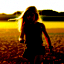

""

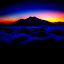

""

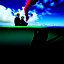

""

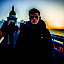

""

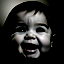

In [ ]:
prompt_embeds = prompt_embeds_dict["a high quality photo"]

generated = []

i_start = 0
im_noisy = torch.randn_like(test_im).to(device).half()

for i in range(5):
  clean = iterative_denoise_cfg(im_noisy,
                            i_start=i_start,
                            prompt_embeds=prompt_embeds,
                            uncond_prompt_embeds=uncond_prompt_embeds,
                            timesteps=strided_timesteps)

  media.show_image(np.transpose(clean[0], (1, 2, 0)))
  generated.append(clean)

""

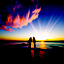

""

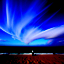

""

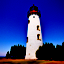

""

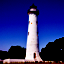

""

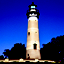

""

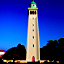

In [ ]:
prompt_embeds = prompt_embeds_dict["a high quality photo"]

uncond_prompt_embeds = prompt_embeds_dict['']

imgs_dict = {}

noise_levels = [1, 3, 5, 7, 10, 20]

for i_start in noise_levels:
  t = strided_timesteps[i_start]
  noisy = forward(test_im, t).to(device).half()

  clean = iterative_denoise_cfg(noisy,
                            i_start=i_start,
                            prompt_embeds=prompt_embeds,
                            uncond_prompt_embeds=uncond_prompt_embeds,
                            timesteps=strided_timesteps)

  media.show_image(np.transpose(clean[0], (1, 2, 0)))
  imgs_dict[i_start] = clean


In [ ]:
# @title Function to Process Images

def process_pil_im(img):
  '''
  Transform a PIL image
  '''

  # Convert to RGB
  img = img.convert('RGB')

  # Define the transform to resize, convert to tensor, and normalize to [-1, 1]
  transform = transforms.Compose([
      transforms.Resize(64),               # Resize shortest side to 64
      transforms.CenterCrop(64),             # Center crop
      transforms.ToTensor(),               # Convert image to PyTorch tensor with range [0, 1]
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
  ])

  # Apply the transformations and add batch dim
  img = transform(img)[None]

  # Show image
  print("Processed image")
  media.show_image(img[0].permute(1,2,0) / 2 + 0.5)

  return img

Processed image


""

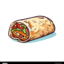

In [ ]:
# @title Download Images from Web

################
################
url = "https://c7.alamy.com/comp/2R947WG/mexican-burrito-wrap-burritos-hand-drawn-illustration-vector-doodle-style-cartoon-illustration-2R947WG.jpg"
################
################

# Download image from URL and process
response = requests.get(url)
web_im = Image.open(BytesIO(response.content))
web_im = process_pil_im(web_im)

100%|██████████| 6/6 [00:24<00:00,  4.06s/it]


1,3,5,7,10,20

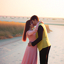
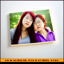
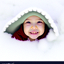
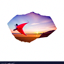
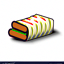
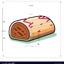

In [ ]:
prompt_embeds = prompt_embeds_dict["a high quality photo"]

imgs_dict = {}
for i_start in tqdm([1, 3, 5, 7, 10, 20]):
  # Add noise
  t = strided_timesteps[i_start]
  im_noisy = forward(web_im, t).half().to(device)

  # Denoise
  clean = iterative_denoise_cfg(im_noisy,
                                i_start=i_start,
                                prompt_embeds=prompt_embeds,
                                uncond_prompt_embeds=uncond_prompt_embeds,
                                timesteps=strided_timesteps,
                                display=False)

  # Add to dict to display later
  imgs_dict[i_start] = clean[0].transpose(1,2,0) / 2. + 0.5

media.show_images(imgs_dict)

Processed image


""

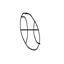

In [ ]:
# @title Hand Drawn Images

############
### N.B. ###
############

# This code is from: https://gist.github.com/karim23657/5ad5e067c1684dbc76c93bd88bf6fa53

############
############

from base64 import b64decode
from IPython.display import HTML
from google.colab.output import eval_js
import urllib.request
board_html = urllib.request.urlopen('https://gist.githubusercontent.com/karim23657/5ad5e067c1684dbc76c93bd88bf6fa53/raw/2ef57f881bc700c2c346bd6c7a7f2d5364b21048/drawing%2520board.html').read().decode('utf-8')

def draw(filename='drawing.png'):
  display(HTML(board_html))
  data = eval_js('triggerImageToServer')
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return Image.open(filename).convert('RGB')

drawn_im = draw('myImage1.png').resize((64,64))
drawn_im = process_pil_im(drawn_im)


100%|██████████| 6/6 [00:24<00:00,  4.00s/it]


1,3,5,7,10,20

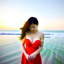
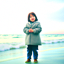
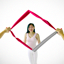
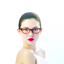
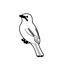
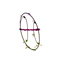

In [ ]:
prompt_embeds = prompt_embeds_dict["a high quality photo"]

imgs_dict = {}
for i_start in tqdm([1, 3, 5, 7, 10, 20]):
  # Add noise
  t = strided_timesteps[i_start]
  im_noisy = forward(drawn_im, t).half().to(device)

  # Denoise
  clean = iterative_denoise_cfg(im_noisy,
                                i_start=i_start,
                                prompt_embeds=prompt_embeds,
                                uncond_prompt_embeds=uncond_prompt_embeds,
                                timesteps=strided_timesteps,
                                display=False)

  # Add to dict to display later
  imgs_dict[i_start] = clean[0].transpose(1,2,0) / 2. + 0.5

media.show_images(imgs_dict)

Image,Mask,To Replace

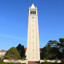
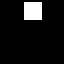
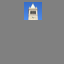

In [ ]:
# Make mask
mask = torch.zeros_like(test_im)
mask[:, :, 2:20, 24:42] = 1.0
mask = mask.to(device)

# Visualize mask
media.show_images({
    'Image': test_im[0].permute(1,2,0) / 2. + 0.5,
    'Mask': mask.cpu()[0].permute(1,2,0),
    'To Replace': (test_im * mask.cpu())[0].permute(1,2,0) / 2. + 0.5,
})

In [ ]:
def inpaint(original_image, mask, prompt_embeds, uncond_prompt_embeds, timesteps, scale=7, display=True):
  image = torch.randn_like(original_image).to(device).half()


  with torch.no_grad():
    for i in range(len(timesteps) - 1):
      # Get timesteps
      t = timesteps[i]
      prev_t = timesteps[i+1]

      # Get alphas, betas

      alpha_cumprod = alphas_cumprod[t]
      alpha_cumprod_prev = alphas_cumprod[prev_t]

      alpha = alpha_cumprod / alpha_cumprod_prev
      beta = 1 - alpha

      # Get cond noise estimate
      model_output = stage_1.unet(
          image,
          t,
          encoder_hidden_states=prompt_embeds,
          return_dict=False
      )[0]

      # Get uncond noise estimate
      uncond_model_output = stage_1.unet(
          image,
          t,
          encoder_hidden_states=uncond_prompt_embeds,
          return_dict=False
      )[0]

      # Split estimate into noise and variance estimate
      noise_est, predicted_variance = torch.split(model_output, image.shape[1], dim=1)
      uncond_noise_est, _ = torch.split(uncond_model_output, image.shape[1], dim=1)

      # Do classifier free guidance

      cfg_noise_est = uncond_noise_est + scale * (noise_est - uncond_noise_est)

      scaled_noise_est = cfg_noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

      x_0 = (image / math.sqrt(alpha_cumprod)) - scaled_noise_est

      x_0_factor = math.sqrt(alpha_cumprod_prev) * beta / (1 - alpha_cumprod)

      scaled_x_0 = x_0_factor * x_0

      x_t = image

      x_t_factor = math.sqrt(alpha) * (1 - alpha_cumprod_prev) / (1 - alpha_cumprod)

      scaled_x_t = x_t_factor * x_t

      pred_prev_image = add_variance(predicted_variance,
                                     t,
                                     scaled_x_t + scaled_x_0)


      noisy = forward(original_image, t).to(device).half()

      pred_prev_image = (((mask * pred_prev_image) +
                         ((1 - mask) * noisy))).half()

      image = pred_prev_image

    clean = image.cpu().detach().numpy()

  return clean


""

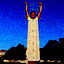

In [ ]:
prompt_embeds = prompt_embeds_dict["a high quality photo"]

uncond_prompt_embeds = prompt_embeds_dict['']

inpainted = inpaint(test_im,
                    mask,
                    prompt_embeds,
                    uncond_prompt_embeds,
                    timesteps=strided_timesteps,
                    display=False)

media.show_image(np.transpose(inpainted[0], (1, 2, 0)))

""

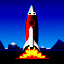

""

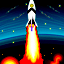

""

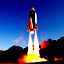

""

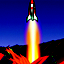

""

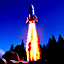

""

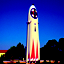

In [ ]:
# Please use this prompt
prompt_embeds = prompt_embeds_dict["a rocket ship"]

uncond_prompt_embeds = prompt_embeds_dict['']

imgs_dict = {}

noise_levels = [1, 3, 5, 7, 10, 20]

for i_start in noise_levels:
  t = strided_timesteps[i_start]
  noisy = forward(test_im, t).to(device).half()

  clean = iterative_denoise_cfg(noisy,
                            i_start=i_start,
                            prompt_embeds=prompt_embeds,
                            uncond_prompt_embeds=uncond_prompt_embeds,
                            timesteps=strided_timesteps)

  media.show_image(np.transpose(clean[0], (1, 2, 0)))
  imgs_dict[i_start] = clean

In [ ]:
def make_flip_illusion(image, i_start, prompt_embeds_1, prompt_embeds_2, uncond_prompt_embeds, timesteps, scale=7, display=True):
  with torch.no_grad():
    for i in range(i_start, len(timesteps) - 1):
      t = timesteps[i]
      prev_t = timesteps[i+1]

      alpha_cumprod = alphas_cumprod[t]
      alpha_cumprod_prev = alphas_cumprod[prev_t]

      alpha = alpha_cumprod / alpha_cumprod_prev
      beta = 1 - alpha

      # For prompt 1
      model_output_1 = stage_1.unet(
          image,
          t,
          encoder_hidden_states=prompt_embeds_1,
          return_dict=False
      )[0]

      uncond_model_output_1 = stage_1.unet(
          image,
          t,
          encoder_hidden_states=uncond_prompt_embeds,
          return_dict=False
      )[0]

      noise_est_1, predicted_variance_1 = torch.split(model_output_1, image.shape[1], dim=1)
      uncond_noise_est_1, _ = torch.split(uncond_model_output_1, image.shape[1], dim=1)

      cfg_noise_est_1 = uncond_noise_est_1 + scale * (noise_est_1 - uncond_noise_est_1)

      # For prompt 2
      flipped_image = torch.flip(image, dims=[-2])

      model_output_2 = stage_1.unet(
          flipped_image,
          t,
          encoder_hidden_states=prompt_embeds_2,
          return_dict=False
      )[0]

      uncond_model_output_2 = stage_1.unet(
          flipped_image,
          t,
          encoder_hidden_states=uncond_prompt_embeds,
          return_dict=False
      )[0]

      noise_est_2, predicted_variance_2 = torch.split(model_output_2, image.shape[1], dim=1)
      uncond_noise_est_2, _ = torch.split(uncond_model_output_2, image.shape[1], dim=1)

      noise_est_2 = torch.flip(noise_est_2, dims=[-2])
      uncond_noise_est_2 = torch.flip(uncond_noise_est_2, dims=[-2])

      cfg_noise_est_2 = uncond_noise_est_2 + scale * (noise_est_2 - uncond_noise_est_2)

      cfg_noise_est = (cfg_noise_est_1 + cfg_noise_est_2) / 2

      scaled_noise_est = cfg_noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

      x_0 = (image / math.sqrt(alpha_cumprod)) - scaled_noise_est

      x_0_factor = math.sqrt(alpha_cumprod_prev) * beta / (1 - alpha_cumprod)

      scaled_x_0 = x_0_factor * x_0

      x_t = image

      x_t_factor = math.sqrt(alpha) * (1 - alpha_cumprod_prev) / (1 - alpha_cumprod)

      scaled_x_t = x_t_factor * x_t

      predicted_variance = (predicted_variance_1 + predicted_variance_2) / 2

      pred_prev_image = add_variance(predicted_variance,
                                     t,
                                     scaled_x_t + scaled_x_0)

      image = pred_prev_image

    clean = image.cpu().detach().numpy()

  return clean

""

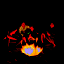

""

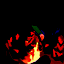

""

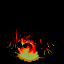

""

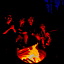

""

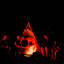

""

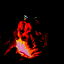

""

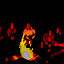

""

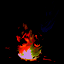

""

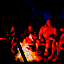

""

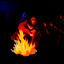

In [ ]:
prompt_embeds_1 = prompt_embeds_dict["an oil painting of people around a campfire"]

prompt_embeds_2 = prompt_embeds_dict["an oil painting of an old man"]

uncond_prompt_embeds = prompt_embeds_dict['']

imgs_dict = {}

i_start = 0
noisy = torch.randn_like(test_im).to(device).half()

for i in range(10):
  t = strided_timesteps[i_start]
  clean = make_flip_illusion(noisy,
                            i_start=i_start,
                            prompt_embeds_1=prompt_embeds_1,
                            prompt_embeds_2=prompt_embeds_2,
                            uncond_prompt_embeds=uncond_prompt_embeds,
                            timesteps=strided_timesteps)

  media.show_image(np.transpose(clean[0], (1, 2, 0)))
  imgs_dict[i_start] = clean

In [ ]:
def make_hybrids(image, i_start, prompt_embeds_1, prompt_embeds_2, uncond_prompt_embeds,
                 timesteps, scale=7, display=True, kernel_size=5, sigma=3.0):
  with torch.no_grad():
    for i in range(i_start, len(timesteps) - 1):
      t = timesteps[i]
      prev_t = timesteps[i+1]

      alpha_cumprod = alphas_cumprod[t]
      alpha_cumprod_prev = alphas_cumprod[prev_t]

      alpha = alpha_cumprod / alpha_cumprod_prev
      beta = 1 - alpha

      # For prompt 1
      model_output_1 = stage_1.unet(
          image,
          t,
          encoder_hidden_states=prompt_embeds_1,
          return_dict=False
      )[0]

      uncond_model_output = stage_1.unet(
          image,
          t,
          encoder_hidden_states=uncond_prompt_embeds,
          return_dict=False
      )[0]

      noise_est_1, predicted_variance_1 = torch.split(model_output_1, image.shape[1], dim=1)
      uncond_noise_est, _ = torch.split(uncond_model_output, image.shape[1], dim=1)

      cfg_noise_est_1 = uncond_noise_est + scale * (noise_est_1 - uncond_noise_est)

      low_freq_cfg_noise_est_1 = TF.gaussian_blur(cfg_noise_est_1, kernel_size, sigma)

      low_freq_predicted_variance_1 = TF.gaussian_blur(predicted_variance_1, kernel_size, sigma)

      # For prompt 2
      model_output_2 = stage_1.unet(
          image,
          t,
          encoder_hidden_states=prompt_embeds_2,
          return_dict=False
      )[0]

      noise_est_2, predicted_variance_2 = torch.split(model_output_2, image.shape[1], dim=1)

      cfg_noise_est_2 = uncond_noise_est + scale * (noise_est_2 - uncond_noise_est)

      low_freq_cfg_noise_est_2 = TF.gaussian_blur(cfg_noise_est_2, kernel_size, sigma)
      high_freq_cfg_noise_est_2 = cfg_noise_est_2 - low_freq_cfg_noise_est_2

      low_freq_predicted_variance_2 = TF.gaussian_blur(predicted_variance_2, kernel_size, sigma)
      high_freq_predicted_variance_2 = predicted_variance_2 - low_freq_predicted_variance_2

      cfg_noise_est = low_freq_cfg_noise_est_1 + high_freq_cfg_noise_est_2

      scaled_noise_est = cfg_noise_est * (math.sqrt((1 - alpha_cumprod)
      / alpha_cumprod))

      x_0 = (image / math.sqrt(alpha_cumprod)) - scaled_noise_est

      x_0_factor = math.sqrt(alpha_cumprod_prev) * beta / (1 - alpha_cumprod)

      scaled_x_0 = x_0_factor * x_0

      x_t = image

      x_t_factor = math.sqrt(alpha) * (1 - alpha_cumprod_prev) / (1 - alpha_cumprod)

      scaled_x_t = x_t_factor * x_t

      predicted_variance = low_freq_predicted_variance_1 + high_freq_predicted_variance_2

      pred_prev_image = add_variance(predicted_variance,
                                     t,
                                     scaled_x_t + scaled_x_0)

      image = pred_prev_image

    clean = image.cpu().detach().numpy()

  return clean

""

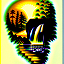

""

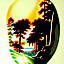

""

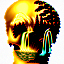

""

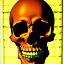

""

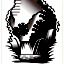

In [ ]:
prompt_embeds_1 = prompt_embeds_dict["a lithograph of a skull"]

prompt_embeds_2 = prompt_embeds_dict["a lithograph of waterfalls"]

uncond_prompt_embeds = prompt_embeds_dict['']

imgs_dict = {}

i_start = 0
noisy = torch.randn_like(test_im).to(device).half()

for i in range(5):
  t = strided_timesteps[i_start]
  clean = make_hybrids(noisy,
                      i_start=i_start,
                      prompt_embeds_1=prompt_embeds_1,
                      prompt_embeds_2=prompt_embeds_2,
                      uncond_prompt_embeds=uncond_prompt_embeds,
                      timesteps=strided_timesteps)

  media.show_image(np.transpose(clean[0], (1, 2, 0)))
  imgs_dict[i_start] = clean

In [ ]:
# @title Loading T5 text encoder

# Load the T5 text encoder (this may take a while)
text_encoder = T5EncoderModel.from_pretrained(
    "DeepFloyd/IF-I-L-v1.0",
    subfolder="text_encoder",
    load_in_8bit=True,
    variant="8bit",
)
text_pipe = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-I-L-v1.0",
    text_encoder=text_encoder,  # pass the previously instantiated text encoder
    unet=None
)

In [ ]:
# @title Making prompt embeds dict

# Prompts to put into dictionary
def get_prompt_embeds_dict():
  prompts = [
    'an oil painting of a snowy mountain village',
    'a photo of the amalfi cost',
    'a photo of a man',
    'a photo of a hipster barista',
    'a photo of a dog',
    'an oil painting of people around a campfire',
    'an oil painting of an old man',
    'a lithograph of waterfalls',
    'a lithograph of a skull',
    'a man wearing a hat',
    'a high quality photo',
    "a rocket ship",
    "a pencil"
    '',   # For CFG
  ]

  # Get prompt embeddings using the T5 model
  # each embedding is of shape [1, 77, 4096]
  # 77 comes from the max sequence length that deepfloyd will take
  # and 4096 comes from the embedding dimension of the text encoder
  prompt_embeds = [text_pipe.encode_prompt(prompt) for prompt in prompts]
  prompt_embeds, negative_prompt_embeds = zip(*prompt_embeds)
  prompt_embeds_dict = dict(zip(prompts, prompt_embeds))

  return prompt_embeds_dict

In [ ]:
prompt_embeds_dict = get_prompt_embeds_dict()

# @title Exporting prompt embeds dict

# Save prompt embeds to colab disk
torch.save(prompt_embeds_dict, 'prompt_embeds_dict.pth')

# Download prompt embeds
from google.colab import files
files.download('prompt_embeds_dict.pth')

In [ ]:
def upsample(image64, prompt_embeds):
  """
  Args:
    image64 : torch tensor of size (1, 3, 64, 64) representing the image
    prompt_embeds : torch tensor of size (1, 77, 4096), prompt embedding

  Returns:
    image256 : torch tensor of size (1, 3, 256, 256), upsampled image
  """

  image256 = stage_2(
      image=image64,
      num_inference_steps=30,
      prompt_embeds=prompt_embeds,
      negative_prompt_embeds=prompt_embeds_dict[''],
      output_type="pt",
  ).images.cpu()

  return image256

hybrid_256 = upsample(torch.tensor(clean),
                      prompt_embeds[:1])
media.show_images(
    {
        'hybrid': hybrid_256[0].permute(1,2,0) / 2. + 0.5,
    }
)